# Assignment 2

Welcome to the assignment for week 2.

## Task 2: Convolution and Canny edge detection

### Task 2.1: Convolution
Implement the convolution operation for 2-D images (i.e. no colors here, sorry).

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

In [3]:
def conv2d(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Convolve a 2D image with a kernel.

    Assumes input image is grayscale.
    Assumes the input makes sense (e.g. kernel is smaller than image)
    and has the correct data types (e.g. no complex numbers)
    """
    kh, kw = kernel.shape
    ih, iw = image.shape

    result = np.zeros_like(image)
    for y in range(ih):
        for x in range(iw):
            for ky in range(kh):
                for kx in range(kw):
                    # calculate the position in the image
                    ix = x + kx - kw // 2
                    iy = y + ky - kh // 2
                    if ix >= 0 and ix < iw and iy >= 0 and iy < ih:
                        result[y, x] += image[iy, ix] * kernel[ky, kx]
    return result

nothing_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

Convolve an image of your choice with a Gaussian kernel. Play around with the size of the kernel and the standard deviation of the Gaussian. Show the results using your conv2d()-function.  (***RESULT***).

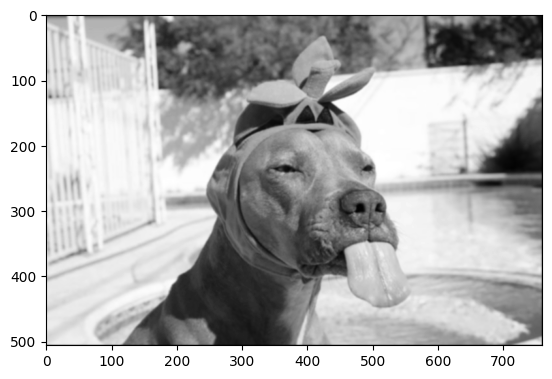

In [ ]:
image = color.rgb2gray(io.imread('images/dog.jpg'))

def gaussian_kernel(size: int, sigma: float) -> np.ndarray:
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)), (size, size))
    kernel /= np.sum(kernel)
    return kernel

smooth = conv2d(image, gaussian_kernel(5, 0.9))

plt.imshow(smooth, cmap='gray')


Now, implement a simple edge detector by first filtering with a Sobel operator and then thresholding the ***RESULT***. How does smoothing the input change the ***RESULT***?

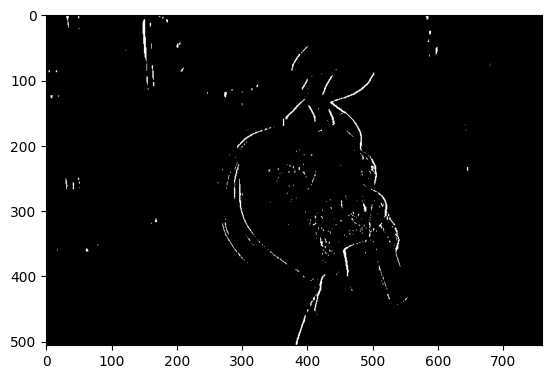

In [ ]:
# sobel
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
convolved = conv2d(image, sobel_x)

# tresholding
threshold = 0.5
plt.imshow(
    np.where(convolved > threshold, 1, 0),
    cmap='gray'
)



### Task 2.2: Canny Edge Detection

#### Preprocessing
If you haven't yet: smooth the image with a Gaussian of your choice. Then use the Sobel operator to create the gradient magnitude and direction matrices according to the lecture. Round the gradient directions to the 8-neighbor's directions. Display all intermediate ***RESULT***s!

In [20]:
# code here
sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

convolved_x = conv2d(image, sobel_x)
convolved_y = conv2d(image, sobel_y)

magnitude = np.sqrt(convolved_x**2 + convolved_y**2)
sign_x = np.sign(convolved_x).astype(int)
sign_y = np.sign(convolved_y).astype(int)

#### Non-Maximum Suppression
Implement the Non-Maximum Suppression step as described in the lecture. Subtract the result from the gradient magnitude image and show the ***RESULT***!

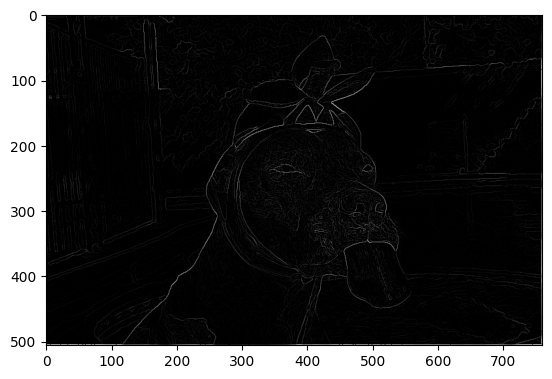

In [27]:
mag = magnitude.copy()
h, w = mag.shape

for y in range(h):
    for x in range(w):
        others = [
                (int(y+other_sign*(sign_x[y, x])), int(x+other_sign*(sign_y[y, x])))
                for other_sign in (-1, 1)
        ]
        if max(
            magnitude[other] for other in
            others
            if other[0] >= 0 and other[0] < h and other[1] >= 0 and other[1] < w
        ) > magnitude[y, x]:
            mag[y, x] = 0
        
plt.imshow(mag, cmap='gray')

#### Thresholding and Edge Tracing
Implement the edge tracing as described in the lecture and show the final result for three different threshold pairs: two low thresholds (e.g. 20 and 50), high thresholds (e.g. 80 and 120) and thresholds with large spacing (e.g. 40 and 140). (***RESULT***)

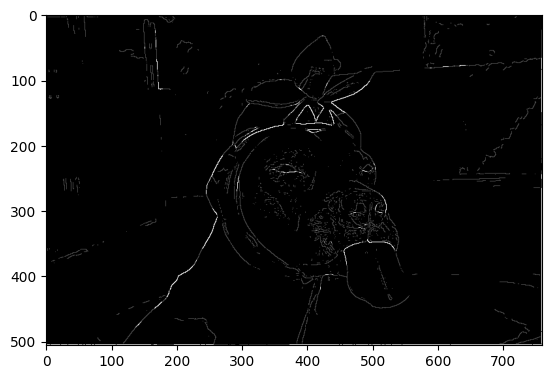

In [52]:
treshhold = (0.1, 0.5) # this has way too many edges
treshhold = (1, 1.5) # this looks almost like just applying the sobel operator
treshhold = (0.5, 1.5) # this looks like a good treshold

treshholded = np.where(
    mag < treshhold[0], 
    0, 
    np.where(mag > treshhold[1], 1, 0.3)
)

plt.imshow(treshholded, cmap='gray')

## Congratz, you made it! :)